In [78]:
import pandas as pd
import sys
import os
import importlib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Configurar el path para poder importar tools
# El notebook está en ENTREGABLES/marcos/, necesitamos subir un nivel a ENTREGABLES/
current_dir = os.getcwd()
# Si estamos en marcos/, subir un nivel
if current_dir.endswith('marcos'):
    entregables_dir = os.path.dirname(current_dir)
else:
    # Si no, buscar el directorio ENTREGABLES en el path actual
    entregables_dir = current_dir
    while not os.path.exists(os.path.join(entregables_dir, 'tools.py')):
        parent = os.path.dirname(entregables_dir)
        if parent == entregables_dir:  # Llegamos a la raíz
            break
        entregables_dir = parent

if os.path.exists(os.path.join(entregables_dir, 'tools.py')):
    if entregables_dir not in sys.path:
        sys.path.insert(0, entregables_dir)
    print(f"✅ Path configurado: {entregables_dir}")
else:
    print("⚠️ No se encontró el archivo tools.py. Verifica la estructura del proyecto.")

# Importar y recargar el módulo tools para asegurar que tenemos la versión más reciente
import tools
importlib.reload(tools)  # Recargar el módulo para obtener los cambios más recientes
from tools import seleccionar_variables

print("✅ Módulo tools recargado e importado correctamente")



✅ Path configurado: c:\Users\marca\OneDrive\AUSTRAL\2do año\2do cuat\TRP II\mercado-libre-fraude-2025\ENTREGABLES
✅ Módulo tools recargado e importado correctamente


In [82]:
df = pd.read_csv("../../DATA/processed/fraud_dataset_processed.csv")

df = seleccionar_variables(df, categoria_encoding=True, pais_encoding=True)

df = df.drop(columns=['producto_nombre'])

In [83]:
# Preparar variables predictoras y target
X = df.drop(columns=['fraude'])
y = df['fraude']

# Split en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Entrenar Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# Predicción
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

# Resultados
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.84938
              precision    recall  f1-score   support

           0       0.99      0.85      0.92     48500
           1       0.15      0.84      0.25      1500

    accuracy                           0.85     50000
   macro avg       0.57      0.84      0.58     50000
weighted avg       0.97      0.85      0.90     50000



In [21]:
num_na_pais = df['pais'].isna().sum()
print(f"Cantidad de NAs en 'pais': {num_na_pais}")



Cantidad de NAs en 'pais': 0


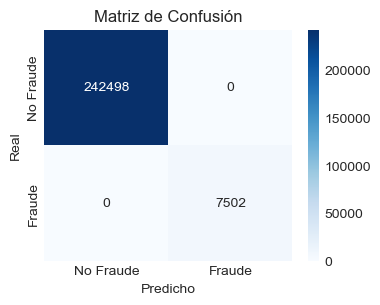

TP: 7502 TN: 242498 FP: 0 FN: 0
